# Multivariate Classification

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator

import matplotlib.pyplot as plt

In [10]:
import sktime
from sktime.utils.data_io import load_from_tsfile_to_dataframe

In [11]:
X_train, y_train = load_from_tsfile_to_dataframe("haptic_train.ts", replace_missing_vals_with='NaN')

In [12]:
X_test, y_test = load_from_tsfile_to_dataframe("haptic_test.ts", replace_missing_vals_with='NaN')

In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(24, 4) (24,) (8, 4) (8,)


In [14]:
X_train.head()

,dim_0,dim_1,dim_2,dim_3
0,0 0.012543 1 0.036043 2 0...,0 0.025548 1 0.074900 2 0.12...,0 1.422915e-02 1 5.910792e-02 2 ...,0 0.0 1 0.0 2 0.0 3 ...
1,0 0.014375 1 0.038606 2 0...,0 0.029446 1 0.080332 2 0.12...,0 1.753303e-02 1 6.447926e-02 2 ...,0 0.0 1 0.0 2 0.0 3 ...
2,0 0.012467 1 0.035841 2 0...,0 0.025383 1 0.074468 2 0.12...,0 0.014092 1 0.058681 2 0.10...,0 0.0 1 0.0 2 0.0 3 ...
3,0 0.014958 1 0.039726 2 0...,0 0.030701 1 0.082715 2 0.13...,0 0.018694 1 0.066842 2 0.11...,0 0.0000 1 0.0000 2 0.000...
4,0 0.013773 1 0.037796 2 0...,0 0.032120 1 0.089776 2 0.14...,0 0.018669 1 0.063593 2 0.13...,0 0.000 1 0.199 2 1.00...


In [15]:
np.unique(y_train)

array(['banana', 'orange'], dtype='<U6')

# TimeSeriesForestClassifier

In [92]:
steps = [("concatenate", ColumnConcatenator()),("classify", TimeSeriesForestClassifier(n_estimators=100)),]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


1.0

In [72]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



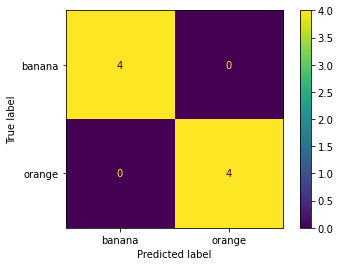

In [93]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

# BOSSEnsemble & ColumnEnsembleClassifier

In [79]:
clf = ColumnEnsembleClassifier(estimators=[("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [80]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



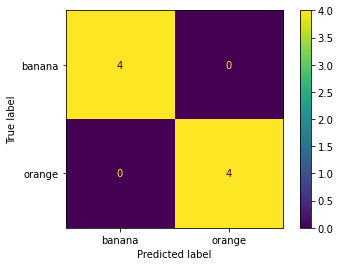

In [95]:
plot_confusion_matrix(clf, X_test, y_test)

# MrSEQLClassifier - univareate time serial classification not sutalble

In [96]:
clf = MrSEQLClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [99]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [101]:
# Cannot plot confution matrix
# plot_confusion_matrix(clf, X_test, y_test)

# Plot 

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope

In [11]:
# binary target variable
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['banana' 'orange'] [12 12]


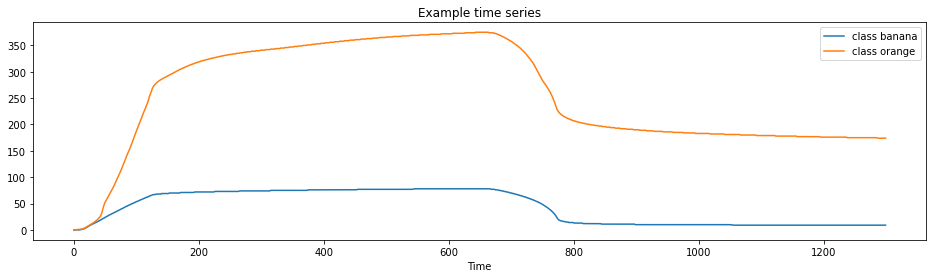

In [18]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_3"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

## Feature extraction with sklearn

In [53]:
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

from sklearn.pipeline import make_pipeline
# with sktime, we can write this as a pipeline
from sktime.transformations.panel.reduce import Tabularizer
from sklearn.ensemble import RandomForestClassifier
from sktime.datatypes._panel._convert import from_nested_to_2d_array

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [64]:
# for univariate tdata this works 

#time_series_tree.fit(X_train, y_train)
#time_series_tree.score(X_test, y_test)

In [45]:
t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xtrain = t.fit_transform(X_train)
Xtest = t.fit_transform(X_test)

Xtrain.head()

Feature Extraction: 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_3__fourier_entropy__bins_2,dim_3__fourier_entropy__bins_3,dim_3__fourier_entropy__bins_5,dim_3__fourier_entropy__bins_10,dim_3__fourier_entropy__bins_100,dim_3__permutation_entropy__dimension_3__tau_1,dim_3__permutation_entropy__dimension_4__tau_1,dim_3__permutation_entropy__dimension_5__tau_1,dim_3__permutation_entropy__dimension_6__tau_1,dim_3__permutation_entropy__dimension_7__tau_1
0,1.0,0.0,0.0,0.0,19378.299766,385719.044982,0.022964,0.022964,-2.023571e-07,14.899659,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.632483,0.823734,0.992637,1.146368,1.286073
1,1.0,0.0,0.0,0.0,19399.704880,386472.250313,0.022988,0.022988,-4.665996e-07,14.920211,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822398,1.075686,1.268945,1.439496,1.589333
2,1.0,0.0,0.0,0.0,19544.830522,392358.198959,0.023126,0.023126,-4.901637e-08,15.073735,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.842623,1.090994,1.268684,1.429784,1.571572
3,1.0,0.0,0.0,0.0,19566.785652,393337.642628,0.023157,0.023157,-6.531864e-07,15.069535,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822892,1.051292,1.215162,1.366163,1.503596
4,1.0,0.0,0.0,0.0,19524.785807,391290.401356,0.023136,0.023136,-3.488946e-07,15.005463,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.645657,0.847281,1.019614,1.173998,1.313434


In [67]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(Xtrain, y_train, test_size=.2)


In [73]:
X_train_fs

,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_3__fourier_entropy__bins_2,dim_3__fourier_entropy__bins_3,dim_3__fourier_entropy__bins_5,dim_3__fourier_entropy__bins_10,dim_3__fourier_entropy__bins_100,dim_3__permutation_entropy__dimension_3__tau_1,dim_3__permutation_entropy__dimension_4__tau_1,dim_3__permutation_entropy__dimension_5__tau_1,dim_3__permutation_entropy__dimension_6__tau_1,dim_3__permutation_entropy__dimension_7__tau_1
6,1.0,0.0,0.0,0.0,19721.304000,398994.789642,0.023296,0.023296,-4.790636e-07,15.220156,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.813147,1.034359,1.213644,1.378383,1.521543
15,1.0,0.0,0.0,0.0,19558.433745,392991.128307,0.023157,0.023157,-8.878914e-07,15.065692,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.666204,0.857939,1.014788,1.150327,1.267684
4,1.0,0.0,0.0,0.0,19524.785807,391290.401356,0.023136,0.023136,-3.488946e-07,15.005463,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.645657,0.847281,1.019614,1.173998,1.313434
10,1.0,0.0,0.0,0.0,19809.955724,402758.764982,0.023410,0.023410,-1.821377e-07,15.288749,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.811119,1.058660,1.253513,1.422627,1.558139
16,1.0,0.0,0.0,0.0,19485.788332,390031.822558,0.023116,0.023116,-8.764312e-07,14.965321,...,0.045395,0.090729,0.090729,0.090729,0.361435,0.338032,0.386251,0.426981,0.463443,0.495168
9,1.0,0.0,0.0,0.0,19567.402542,393070.904997,0.023180,0.023180,-2.218084e-07,15.044804,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.791889,1.058371,1.262056,1.444229,1.616608
2,1.0,0.0,0.0,0.0,19544.830522,392358.198959,0.023126,0.023126,-4.901637e-08,15.073735,...,0.045395,0.045395,0.045395,0.090729,0.136002,0.842623,1.090994,1.268684,1.429784,1.571572
12,1.0,0.0,0.0,0.0,19305.437021,382740.733546,0.022897,0.022897,-4.113527e-07,14.831833,...,0.045395,0.045395,0.045395,0.125256,0.181214,0.435057,0.550535,0.638111,0.720644,0.796476
13,1.0,0.0,0.0,0.0,19477.822040,389961.648751,0.023123,0.023123,-2.357793e-07,14.960650,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.597924,0.780730,0.915960,1.046051,1.157014
3,1.0,0.0,0.0,0.0,19566.785652,393337.642628,0.023157,0.023157,-6.531864e-07,15.069535,...,0.045395,0.045395,0.045395,0.045395,0.136002,0.822892,1.051292,1.215162,1.366163,1.503596


In [82]:
from sklearn.metrics import classification_report

classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_train_fs, y_train_fs)
print(classifier_full.score(X_train_fs, y_train_fs))
print(classification_report(y_test_fs, classifier_full.predict(X_test_fs)))



1.0
              precision    recall  f1-score   support

      banana       0.80      1.00      0.89         4
      orange       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

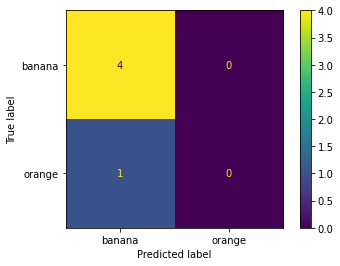

In [94]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier_full, X_test_fs, y_test_fs)

### Time series forest

In [75]:
from sktime.classification.compose import ComposableTimeSeriesForestClassifier

In [77]:
tsf = ComposableTimeSeriesForestClassifier(
    estimator=time_series_tree,
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    random_state=1,
    n_jobs=-1,
)

In [78]:
tsf.fit(X_train, y_train)

if tsf.oob_score:
    print(tsf.oob_score_)

ValueError: X must be univariate with X.shape[1] == 1, but found: X.shape[1] == 4.

In [38]:
# remove NaN

#from tsfresh import select_features
#from tsfresh.utilities.dataframe_functions import impute

#impute(Xt)    #impute(extracted_features)
#features_filtered = select_features(Xt, y_train)   #select_features(extracted_features, y)

In [66]:
#this is for ts file formet without feature extreacted 

#classifier = make_pipeline(TSFreshFeatureExtractor(show_warnings=False), RandomForestClassifier())
#classifier.fit(Xtrain, y_train)   
#classifier.score(Xtest, y_test)

# Trying out other Classification 

In [35]:
from sktime.datatypes._panel._convert import from_nested_to_2d_array

X_train_tab = from_nested_to_2d_array(X_train)
X_test_tab = from_nested_to_2d_array(X_test)

X_train_tab.head()

,dim_0__0,dim_0__1,dim_0__2,dim_0__3,dim_0__4,dim_0__5,dim_0__6,dim_0__7,dim_0__8,dim_0__9,...,dim_3__1290,dim_3__1291,dim_3__1292,dim_3__1293,dim_3__1294,dim_3__1295,dim_3__1296,dim_3__1297,dim_3__1298,dim_3__1299
0,0.012543,0.036043,0.059006,0.081902,0.104850,0.127903,0.150813,0.173717,0.196644,0.219587,...,174.0,174.0,174.0,174.0,174.0,174.0,174.0000,174.0,174.0,174.0
1,0.014375,0.038606,0.061539,0.084415,0.107317,0.130247,0.153141,0.176039,0.198917,0.221800,...,113.0,113.0,113.0,113.0,113.0,113.0,113.0000,113.0,113.0,113.0
2,0.012467,0.035841,0.058735,0.081596,0.104467,0.127406,0.150281,0.173147,0.196019,0.218881,...,112.0,112.0,112.0,112.0,112.0,112.0,112.0000,112.0,112.0,112.0
3,0.014958,0.039726,0.062717,0.085645,0.108565,0.131512,0.154458,0.177379,0.200304,0.223222,...,77.0,77.0,77.0,77.0,77.0,77.0,76.1355,76.0,76.0,76.0
4,0.013773,0.037796,0.061035,0.084175,0.107401,0.130678,0.153766,0.176883,0.200145,0.223457,...,254.0,254.0,254.0,254.0,254.0,254.0,253.4630,253.0,253.0,253.0


In [34]:
features_filtered

""
0
1
2
3
4
5
6
7
8
9


In [22]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train_tab, y_train)
dummy_clf.score(X_test_tab, y_test)

0.5

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rand_clf = RandomForestClassifier(n_estimators=100)
rand_clf.fit(X_train_tab, y_train)
y_predict = rand_clf.predict(X_test_tab)

print("Accuracy:",metrics.accuracy_score(y_test,y_predict))


Accuracy: 1.0
